In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import pandas as pd

def sum_ins_table(temp_sum=None):
    start_col = 1
    end_col = 3
    ans = []
    for index in range(3):

        first_df = temp_sum.loc[:, start_col:end_col]
        first_df.columns = ['期货公司会员简称', '成交量', '比上交易日增减']
        # first_df['成交量'].astype(float)
        # first_df['比上交易日增减'].astype(float)
        # first_df[['成交量', '比上交易日增减']] = first_df[['成交量', '比上交易日增减']].astype(float, copy=True)
        # print(first_df['比上交易日增减'])

        first_df['成交量'] = first_df['成交量'].astype(float, copy=False)
        first_df['比上交易日增减'] = first_df['比上交易日增减'].astype(float, copy=False)
        # first_df.rename(columns=['期货公司会员简称', '成交量', '比上交易日增减'], inplace=True)
        first_ans = first_df.groupby(['期货公司会员简称', ])['成交量', '比上交易日增减'].sum() \
            .sort_values(by=['成交量'], ascending=False).reset_index().head(20)
        # print(first_ans)
        ans.append(first_ans)
        start_col += 4
        end_col += 4
    return ans
def split_ins(df):
    temp_index = df.index[df[0].str.contains('商品名称', case=False)].tolist()
    index_length = len(temp_index)
    ans_list = []
    for id in range(index_length):
        ins_df = None
        if id == index_length-1:
            ins_df = df[temp_index[id]:]
        else:
            ins_df = df[temp_index[id]:temp_index[id+1]]
        ins_df = ins_df.reset_index(drop=True)
        # print(ins_df)
        tb_index = ins_df.index[ins_df[0].str.contains('名次', case=False)].tolist()
        ins_header = ins_df[:(tb_index[0] - 1)]
        # 商品名称 ：铜                  2018-02-23
        ins_name = ins_header.iloc[0,0]
        import re
        x = re.split("：", ins_name)
        x = x[1].split()
        instrument = x[0]
        instrument_date = x[1]
        ins_name.split()
        temp_sum = None
        length = len(tb_index)
        for index, item in enumerate(tb_index):
            temp_df_1 = None
            if (index == length - 1):

                temp_df_1 = ins_df[(tb_index[index] + 1):-2]

            else:
                temp_df_1 = ins_df[(tb_index[index] + 1):(tb_index[index + 1] - 2)]
                # temp_df_1 = cu_df[(index + 1):(index+1 - 2)]
            if temp_sum is None:
                temp_sum = temp_df_1
            else:
                temp_sum = temp_sum.append(temp_df_1)
        # print(temp_sum)
        print('-'*100 + instrument + '-'*100)
        rankings = sum_ins_table(temp_sum)
        print(rankings)
        print('-' * 100 + instrument + '-' * 100)
        ans = {}
        ans['instrument'] = instrument
        ans['date'] = instrument_date
        ans['ranking'] = rankings
        ans_list.append(ans)
    return ans_list

In [12]:
a_file = '排名表2018-02-23.csv'
df = pd.read_csv(a_file,names=range(12), encoding='gbk')
   
ans = split_ins(df)
# df = pd.DataFrame(clean_records,columns=['trade_type', 'time', 'sum',])
# print(df.head())

----------------------------------------------------------------------------------------------------铜----------------------------------------------------------------------------------------------------


C:\Users\niejn\PycharmProjects\scrapy_demo\venv\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\niejn\PycharmProjects\scrapy_demo\venv\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[   期货公司会员简称      成交量  比上交易日增减
0    海通期货    45097.0  25550.0
1    东证期货    43925.0  21281.0
2    上海中期    28737.0  23098.0
3    中融汇信    26358.0  18871.0
4    中信期货    25339.0  16955.0
5    鲁证期货    22040.0  13500.0
6    国投安信    21650.0  13024.0
7    五矿经易    17756.0  14825.0
8    永安期货    12150.0  10853.0
9    银河期货    11848.0   9134.0
10   兴证期货    11089.0   7587.0
11   华泰期货    10782.0   7816.0
12   金瑞期货    10607.0   6083.0
13   国泰君安    10592.0   4760.0
14   铜冠金源     9597.0   6403.0
15   中辉期货     9591.0   6080.0
16   国富期货     6743.0   4325.0
17   宏源期货     5774.0   3292.0
18   广发期货     4653.0   3872.0
19   方正中期     4641.0   3324.0,    期货公司会员简称      成交量  比上交易日增减
0    格林大华    46968.0    -48.0
1    金瑞期货    32725.0   -206.0
2    永安期货    26323.0    873.0
3    中信期货    17497.0   -423.0
4    国泰君安    14509.0   -392.0
5    弘业期货    10363.0  -1864.0
6    方正中期     9806.0    696.0
7    国贸期货     9792.0   -202.0
8    五矿经易     9036.0    293.0
9    铜冠金源     8086.0   -788.0
10   海通期货     7560.0    730.0
11   迈科期

[   期货公司会员简称      成交量  比上交易日增减
0    海通期货    60417.0  26056.0
1    中信期货    38765.0  17593.0
2    东证期货    28401.0   6696.0
3    中融汇信    19771.0   6631.0
4    鲁证期货    18627.0   6335.0
5    申万期货    13845.0   8388.0
6    中辉期货    13363.0   1276.0
7    国投安信    12658.0   6248.0
8    同信久恒    11428.0   4295.0
9    国泰君安    10806.0   4804.0
10   国海良时     8975.0   8403.0
11   华泰期货     8786.0   5548.0
12   永安期货     8778.0   5168.0
13   兴证期货     8303.0   4092.0
14   上海中期     6920.0   4382.0
15   东航期货     6084.0   4197.0
16   华鑫期货     5820.0   3381.0
17   西南期货     5228.0   2818.0
18   华安期货     4672.0   3262.0
19   方正中期     4501.0   3042.0,    期货公司会员简称      成交量  比上交易日增减
0    国信期货    35901.0   -215.0
1    国贸期货    20817.0    277.0
2    中信期货    16953.0    691.0
3    英大期货    15800.0   -305.0
4    中粮期货    15756.0   -546.0
5    迈科期货    13554.0   -627.0
6    金瑞期货    11963.0   -959.0
7    国泰君安    11640.0   -527.0
8    广发期货     9207.0    617.0
9    华泰期货     9037.0   3096.0
10   五矿经易     8893.0    494.0
11   银河期

[   期货公司会员简称      成交量  比上交易日增减
0    海通期货    94249.0  20181.0
1    中信期货    43700.0  11458.0
2    鲁证期货    33583.0  11546.0
3    东证期货    28014.0    -52.0
4    中融汇信    21683.0   4572.0
5    国投安信    16207.0    583.0
6    兴证期货    14326.0   2348.0
7    上海中期    13717.0   6887.0
8    中辉期货    11746.0   6194.0
9    华安期货    11395.0   6122.0
10   国泰君安    10163.0    957.0
11   同信久恒     9457.0  -2256.0
12   铜冠金源     9310.0   1897.0
13   华泰期货     7273.0   2674.0
14   中粮期货     7033.0   -385.0
15   永安期货     6117.0   2626.0
16   申万期货     5894.0    148.0
17   徽商期货     5817.0   3434.0
18   南华期货     4684.0   1294.0
19   中国国际     4052.0   2261.0,    期货公司会员简称      成交量  比上交易日增减
0    中信期货    15858.0    600.0
1    五矿经易    15374.0    246.0
2    中粮期货    11337.0   -351.0
3    上海中期    10887.0    995.0
4    金瑞期货    10641.0    404.0
5    建信期货     7332.0   1295.0
6    海通期货     7272.0    843.0
7    首创期货     6954.0   -241.0
8    银河期货     5978.0   -127.0
9    迈科期货     5591.0    -15.0
10   广发期货     5346.0    187.0
11   兴证期

[   期货公司会员简称     成交量  比上交易日增减
0    海通期货    5223.0   2390.0
1    中信期货    3613.0    325.0
2    国投安信    2656.0    662.0
3    兴证期货    1806.0    633.0
4    鲁证期货    1673.0    568.0
5    上海中期    1617.0   1142.0
6    银河期货    1530.0   1360.0
7    方正中期    1465.0   1149.0
8    国泰君安    1368.0    390.0
9    中融汇信    1131.0    144.0
10   中辉期货    1002.0    128.0
11   永安期货     976.0    135.0
12   南华期货     935.0    510.0
13   弘业期货     722.0    675.0
14   东证期货     642.0    254.0
15   铜冠金源     541.0    384.0
16   华安期货     539.0    361.0
17   申万期货     489.0    111.0
18   徽商期货     446.0    329.0
19   中信建投     390.0     84.0,    期货公司会员简称     成交量  比上交易日增减
0    海通期货    2270.0    -69.0
1    东证期货    2110.0     15.0
2    中银国际    2086.0   -156.0
3    国投安信    1687.0    -13.0
4    永安期货    1349.0     47.0
5    五矿经易    1252.0      3.0
6    中信期货    1152.0      0.0
7    方正中期    1070.0    228.0
8    同信久恒    1009.0      2.0
9    银河期货     873.0     35.0
10   广发期货     835.0     22.0
11   建信期货     622.0     25.0
12   国泰君安   

[   期货公司会员简称      成交量  比上交易日增减
0    海通期货    81487.0  47862.0
1    东证期货    25541.0  10847.0
2    中信期货    25217.0  15163.0
3    徽商期货    23314.0  16637.0
4    国投安信    19986.0   7782.0
5    国泰君安    19084.0  10680.0
6    申万期货    17075.0  11745.0
7    永安期货    16808.0  10227.0
8    兴证期货    16432.0   9568.0
9    华泰期货    15878.0   9854.0
10   银河期货    13753.0   9000.0
11   鲁证期货    13626.0   7417.0
12   东航期货    13241.0   9525.0
13   方正中期    13061.0   9505.0
14   华安期货    13045.0   9854.0
15   浙商期货    12962.0   5929.0
16   南华期货    12070.0   4808.0
17   招商期货     9373.0   3810.0
18   宏源期货     8709.0   5750.0
19   中信建投     8070.0   2223.0,    期货公司会员简称      成交量  比上交易日增减
0    永安期货    24610.0    614.0
1    海通期货    23861.0   5051.0
2    国泰君安    22631.0   1052.0
3    中信期货    19653.0    572.0
4    五矿经易    13740.0   1905.0
5    国贸期货    13177.0    530.0
6    方正中期    11054.0    601.0
7    华泰期货     8707.0   1827.0
8    中信建投     7738.0    165.0
9    南华期货     7527.0   -547.0
10   国投安信     7360.0   1541.0
11   中粮期

[   期货公司会员简称     成交量  比上交易日增减
0    海通期货    2122.0   1092.0
1    中信期货     961.0    570.0
2    方正中期     723.0    344.0
3    国投安信     544.0    140.0
4    鲁证期货     537.0    219.0
5    华安期货     503.0    260.0
6    徽商期货     471.0    277.0
7    东证期货     417.0    298.0
8    金瑞期货     331.0    216.0
9    申万期货     321.0     76.0
10   华泰期货     299.0    241.0
11   银河期货     291.0    176.0
12   东航期货     275.0    144.0
13   西部期货     267.0    132.0
14   广发期货     233.0    137.0
15   长江期货     228.0    132.0
16   中辉期货     223.0    -45.0
17   中信建投     220.0    115.0
18   中融汇信     217.0      8.0,    期货公司会员简称     成交量  比上交易日增减
0    中信期货    1868.0    -18.0
1    金瑞期货    1862.0     -6.0
2    安粮期货     717.0      2.0
3    国泰君安     673.0    -26.0
4    徽商期货     602.0      6.0
5    云晨期货     478.0      8.0
6    兴业期货     451.0     -1.0
7    永安期货     424.0    -43.0
8    五矿经易     298.0     21.0
9    东证期货     274.0    -15.0
10   大有期货     250.0      6.0
11   南华期货     231.0    -53.0
12   中国国际     193.0     -7.0
13   宏源期货   

[   期货公司会员简称      成交量  比上交易日增减
0    海通期货    12316.0   1236.0
1    上海中期     7918.0   2223.0
2    东证期货     5947.0   2016.0
3    广发期货     5456.0   1096.0
4    国泰君安     5078.0    575.0
5    中融汇信     4693.0   2016.0
6    国投安信     2815.0    505.0
7    中信期货     2703.0    397.0
8    一德期货     2654.0    792.0
9    华泰期货     1617.0      7.0
10   平安期货     1498.0    837.0
11   鲁证期货     1448.0   -611.0
12   徽商期货     1410.0    274.0
13   兴证期货     1352.0     57.0
14   建信期货     1159.0    318.0
15   南华期货     1152.0    350.0
16   东海期货     1054.0    -75.0
17   永安期货     1049.0    265.0
18   国金期货      945.0    738.0
19   金瑞期货      932.0     67.0,    期货公司会员简称      成交量  比上交易日增减
0    中信期货    12984.0   -143.0
1    五矿经易    12129.0    426.0
2    申万期货    10414.0     71.0
3    银河期货     9017.0    -44.0
4    海通期货     5861.0   -409.0
5    华泰期货     5518.0    287.0
6    永安期货     4820.0     97.0
7    山金期货     4291.0     10.0
8    方正中期     4286.0   -204.0
9    国泰君安     4267.0     82.0
10   东证期货     3401.0    488.0
11   中衍期

[   期货公司会员简称      成交量  比上交易日增减
0    海通期货    27865.0   8859.0
1    中信期货    22430.0   7639.0
2    中融汇信    21116.0  13395.0
3    上海中期    13567.0  11291.0
4    东证期货    12698.0  10208.0
5    中信建投     8699.0   7324.0
6    南华期货     8427.0   6520.0
7    同信久恒     8286.0   1984.0
8    国泰君安     6961.0   3100.0
9    国投安信     6594.0   1423.0
10   兴证期货     6489.0   3359.0
11   华泰期货     6458.0   2422.0
12   招商期货     5893.0   2938.0
13   平安期货     5891.0   5016.0
14   建信期货     5546.0    414.0
15   徽商期货     5387.0   3975.0
16   广发期货     5268.0   4037.0
17   宏源期货     5054.0   3052.0
18   永安期货     5029.0   3129.0,    期货公司会员简称      成交量  比上交易日增减
0    海通期货    26332.0     53.0
1    方正中期    18263.0    367.0
2    华泰期货    16380.0    230.0
3    永安期货    12120.0   1128.0
4    中信期货    11427.0    239.0
5    建信期货    11287.0   1174.0
6    东证期货    11095.0  -7254.0
7    国泰君安     9832.0    364.0
8    国投安信     9386.0    630.0
9    南华期货     9114.0   1181.0
10   首创期货     8921.0    -28.0
11   金瑞期货     8671.0     41.0
12   通惠期

[   期货公司会员简称       成交量   比上交易日增减
0    海通期货    209605.0   61526.0
1    中信期货    207507.0  101290.0
2    永安期货    163021.0   94377.0
3    国投安信    140165.0   42878.0
4    东证期货    121551.0   33327.0
5    方正中期    108454.0   44938.0
6    银河期货    100255.0   54273.0
7    申万期货     99941.0   45174.0
8    华泰期货     95320.0   38079.0
9    徽商期货     87359.0   28301.0
10   鲁证期货     85973.0   44498.0
11   国泰君安     77458.0   30274.0
12   兴证期货     75826.0   17825.0
13   浙商期货     75335.0   40848.0
14   东海期货     68225.0   37665.0
15   中辉期货     56547.0   36453.0
16   同信久恒     52103.0   13527.0
17   光大期货     51555.0   15214.0
18   弘业期货     50629.0   27600.0
19   上海大陆     49433.0   32268.0,    期货公司会员简称       成交量  比上交易日增减
0    永安期货    136937.0  43139.0
1    申万期货     86302.0   2298.0
2    中信期货     83569.0  -7837.0
3    国泰君安     82905.0   5599.0
4    鲁证期货     70951.0  -7750.0
5    华泰期货     40514.0  12125.0
6    海通期货     38040.0   5243.0
7    浙商期货     30741.0  -9697.0
8    新湖期货     30382.0    384.0
9    广发期货     28

[   期货公司会员简称      成交量  比上交易日增减
0    海通期货    60782.0  23282.0
1    东证期货    39353.0  15343.0
2    中信期货    28153.0   8609.0
3    永安期货    26483.0  10758.0
4    兴证期货    20125.0   5946.0
5    方正中期    19535.0  11759.0
6    鲁证期货    17757.0   8600.0
7    华泰期货    17455.0   6973.0
8    国投安信    16815.0   7517.0
9    银河期货    15907.0   8682.0
10   国泰君安    15896.0   6698.0
11   徽商期货    13322.0   7782.0
12   南华期货    12192.0   7679.0
13   中国国际    11886.0   8294.0
14   中信建投    11502.0   6820.0
15   一德期货    10515.0   7769.0
16   浙商期货    10373.0   6536.0
17   广发期货    10175.0   7378.0
18   西南期货     9905.0   1721.0,    期货公司会员简称      成交量  比上交易日增减
0    中信期货    33323.0    878.0
1    永安期货    23138.0   -775.0
2    华泰期货    18479.0   3306.0
3    海通期货    11753.0   4309.0
4    银河期货    11303.0   -634.0
5    国泰君安    10510.0   2656.0
6    光大期货     9652.0    168.0
7    方正中期     8021.0   -549.0
8    瑞达期货     7399.0   2913.0
9    兴证期货     7218.0   3750.0
10   信达期货     6190.0     36.0
11   一德期货     5875.0  -1022.0
12   中财期

[   期货公司会员简称      成交量  比上交易日增减
0    永安期货    24676.0  12103.0
1    海通期货    17597.0   3134.0
2    东证期货    16244.0  -3089.0
3    中信期货    16007.0   1511.0
4    国泰君安    15120.0   9120.0
5    申万期货    15044.0   7817.0
6    国海良时     9663.0   6852.0
7    华泰期货     9105.0   5176.0
8    兴证期货     8826.0   3938.0
9    国投安信     8282.0    902.0
10   鲁证期货     8213.0   3520.0
11   银河期货     6842.0  -1696.0
12   徽商期货     6316.0   1859.0
13   广发期货     6237.0   2402.0
14   方正中期     6193.0   2941.0
15   东航期货     5373.0   2313.0
16   东海期货     4725.0   3649.0
17   华安期货     4636.0   2457.0
18   冠通期货     4622.0   4283.0,    期货公司会员简称      成交量  比上交易日增减
0    永安期货    29457.0  -2361.0
1    银河期货    17135.0   2117.0
2    申万期货    14242.0    984.0
3    华泰期货    10276.0   3245.0
4    中信期货     9654.0   -112.0
5    长江期货     5727.0      6.0
6    五矿经易     4846.0   -608.0
7    国泰君安     4590.0  -2055.0
8    鲁证期货     4224.0   2045.0
9    光大期货     4162.0   -187.0
10   广发期货     3854.0   -462.0
11   兴证期货     3521.0   1090.0
12   海通期

[   期货公司会员简称      成交量  比上交易日增减
0    海通期货    64424.0  29890.0
1    东证期货    29455.0   9216.0
2    国投安信    25869.0  10726.0
3    方正中期    18237.0   5830.0
4    鲁证期货    17167.0   8533.0
5    中信期货    15119.0   6950.0
6    永安期货    11304.0   6401.0
7    国泰君安    10565.0   5746.0
8    华泰期货    10530.0   6422.0
9    徽商期货    10156.0   7507.0
10   银河期货     8992.0   6110.0
11   申万期货     8685.0   5989.0
12   中信建投     8684.0   5219.0
13   南华期货     8139.0   3249.0
14   光大期货     7887.0   4360.0
15   兴证期货     7374.0   2435.0
16   金瑞期货     7212.0   1976.0
17   中国国际     6950.0   3674.0
18   华安期货     6153.0   4477.0
19   东航期货     5609.0   3106.0,    期货公司会员简称      成交量  比上交易日增减
0    永安期货    11265.0   -382.0
1    银河期货     9105.0    114.0
2    方正中期     8785.0   -155.0
3    中信期货     8450.0   -253.0
4    南华期货     7552.0    -39.0
5    广发期货     7245.0   -513.0
6    华泰期货     6805.0    907.0
7    中国国际     6121.0    675.0
8    海通期货     6047.0   -245.0
9    光大期货     5360.0    472.0
10   浙商期货     5239.0   -120.0
11   徽商期

In [13]:
test = ans[0]
# print(test)
test_df = test[ 'ranking'][0]
print(test_df)

   期货公司会员简称      成交量  比上交易日增减
0    海通期货    45097.0  25550.0
1    东证期货    43925.0  21281.0
2    上海中期    28737.0  23098.0
3    中融汇信    26358.0  18871.0
4    中信期货    25339.0  16955.0
5    鲁证期货    22040.0  13500.0
6    国投安信    21650.0  13024.0
7    五矿经易    17756.0  14825.0
8    永安期货    12150.0  10853.0
9    银河期货    11848.0   9134.0
10   兴证期货    11089.0   7587.0
11   华泰期货    10782.0   7816.0
12   金瑞期货    10607.0   6083.0
13   国泰君安    10592.0   4760.0
14   铜冠金源     9597.0   6403.0
15   中辉期货     9591.0   6080.0
16   国富期货     6743.0   4325.0
17   宏源期货     5774.0   3292.0
18   广发期货     4653.0   3872.0
19   方正中期     4641.0   3324.0


中信期货  


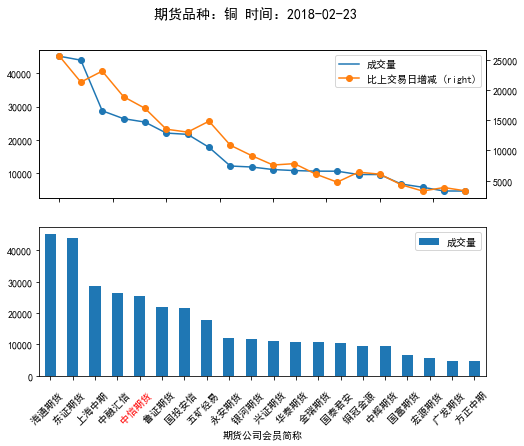

In [66]:

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#coding:utf-8
import matplotlib.pyplot as plt
# plt.xticks(rotation=90)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'
# plt.figure()
# #coding:utf-8  
# import matplotlib  
# matplotlib.use('qt4agg')  
# from matplotlib.font_manager import *  
# import matplotlib.pyplot as plt  
# #定义自定义字体，文件名从1.b查看系统中文字体中来  
# myfont = FontProperties(fname='/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc')  
# #解决负号'-'显示为方块的问题  
# matplotlib.rcParams['axes.unicode_minus']=False  
# plt.plot([-1,2,-5,3])  
# plt.title(u'中文',fontproperties=myfont)  
# plt.show()  
# plt.xticks(rotation=90)
fig, axes = plt.subplots(nrows=2, ncols=1,)
fig.set_figheight(6)
fig.set_figwidth(8)
# test_df['time'] = test_df['time'].apply(lambda x: x.strftime('%Y-%m-%d'))
ax = test_df[['期货公司会员简称', '成交量']].plot(
    x='期货公司会员简称', linestyle='-', marker='o', ax=axes[0])
ax2 = test_df[['期货公司会员简称', '比上交易日增减']].plot(
    x='期货公司会员简称', linestyle='-', marker='o', secondary_y=True,ax = axes[0])
test_df[['期货公司会员简称', '成交量']].plot(x='期货公司会员简称', kind='bar'
                                                    
                                                   
                                                   ,sharex=True
                                                   ,ax = axes[1])
axes[1].xaxis.set_tick_params(rotation=45)
# axes[1].set_xlabel("x-label", color="red")
# [t.set_color('red') for t in axes[1].xaxis.get_ticklabels()]
for t in axes[1].xaxis.get_ticklabels():
    temp = t.get_text()
    temp = temp.strip()
    # t.set_fontsize(13)
    if temp == '中信期货':
        print(t.get_text())
        # t.set_fontsize(13)
        t.set_color('red')
        t.set_weight( 'extra bold')
# plt.setp(axes[1].get_xticklabels(), color="red")
# [i.set_color("red") for i in plt.gca().get_xticklabels()]

# for label in axes[1].get_xticklabels():
#     label.set_fontproperties(ticks_font)
#     ax.set_xticklabels(xlabels, rotation=45, rotation_mode="anchor")
# axes[1].set_xticklabels(minor=False, rotation=45)
# for k in ax.get_xmajorticklabels():
#     if some-condition:
#         k.set_color(any_colour_you_like)
# 
# draw()



fig.suptitle('期货品种：铜 时间：2018-02-23', fontsize=14, fontweight='bold');                                         
import io
from PIL import Image
import xlsxwriter

from io import BytesIO
import matplotlib.pyplot as plt
imgdata = BytesIO()

fig.savefig(imgdata, format="png")
imgdata.seek(0)
import io
from PIL import Image
import xlsxwriter

workbook = xlsxwriter.Workbook('期货公司排名.xlsx')
worksheet = workbook.add_worksheet("期货公司排名")

image_width = 140.0
image_height = 182.0

cell_width = 64.0
cell_height = 20.0

x_scale = cell_width/image_width * 10
y_scale = cell_height/image_height * 10





# use with xlsxwriter
image_path = 'sales.png'
bound_width_height = (240, 240)
worksheet.insert_image('B5', image_path, {'image_data': imgdata,})
worksheet.insert_image('B40', image_path, {'image_data': imgdata,})
workbook.close()
plt.show()
plt.show()

In [5]:
'''for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    item.set_fontsize(20)
    '''

# #coding:utf-8  
# import matplotlib  
# matplotlib.use('qt4agg')  
# from matplotlib.font_manager import *  
# import matplotlib.pyplot as plt  
# #定义自定义字体，文件名从1.b查看系统中文字体中来  
# myfont = FontProperties(fname='/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc')  
# #解决负号'-'显示为方块的问题  
# matplotlib.rcParams['axes.unicode_minus']=False  
# plt.plot([-1,2,-5,3])  
# plt.title(u'中文',fontproperties=myfont)  
# plt.show()  

In [4]:
# #coding:utf-8  
# import matplotlib  
# matplotlib.use('qt4agg')  
# from matplotlib.font_manager import *  
# import matplotlib.pyplot as plt  
# #定义自定义字体，文件名从1.b查看系统中文字体中来  
# myfont = FontProperties(fname='/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc')  
# #解决负号'-'显示为方块的问题  
# matplotlib.rcParams['axes.unicode_minus']=False  
# plt.plot([-1,2,-5,3])  
# plt.title(u'中文',fontproperties=myfont)  
# plt.show()  

Text(0,0.5,'纵坐标')

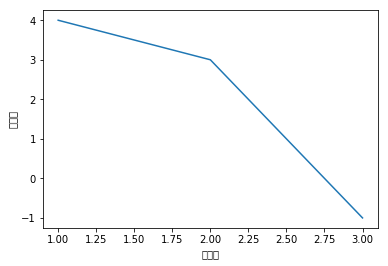

In [3]:
import matplotlib.pyplot as plt
#coding:utf-8

plt.plot((1,2,3),(4,3,-1))
plt.xlabel(u'横坐标')
plt.ylabel(u'纵坐标')
# plt.show()

Text(0,0.5,'纵坐标')

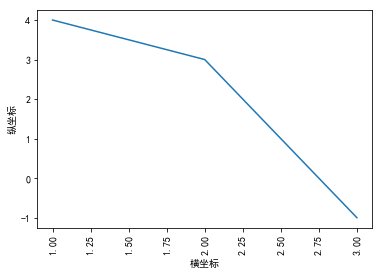

In [10]:
import matplotlib.pyplot as plt
#coding:utf-8
import matplotlib.pyplot as plt
# plt.rcParams['xtick.direction'] = 'out'
# plt.rcParams['ytick.direction'] = 'out'
plt.xticks(rotation=90)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['font.sans-serif']=['msyh'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'
plt.plot((1,2,3),(4,3,-1))
plt.xlabel(u'横坐标')
plt.ylabel(u'纵坐标')

a


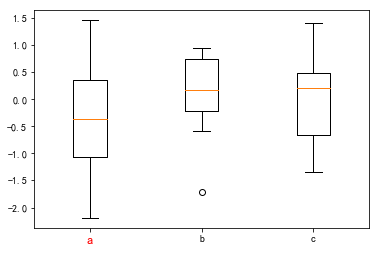

In [50]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
p = plt.boxplot(np.random.normal(size=(10, 3)))
ax.set_xticklabels(list("abc"))
for t in ax.xaxis.get_ticklabels():
    temp = t.get_text()
    temp = temp.strip()
    if temp == 'a':
        print(t.get_text())
        t.set_fontsize(13)
        t.set_color('red')

# plt.show()